# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold, cross_val_score

# Onehot encoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    recall_score, precision_score, f1_score,
    make_scorer, fbeta_score, cohen_kappa_score
)

import xgboost as xgb

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
train0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/train.csv')
test0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/test.csv')

In [3]:
train_id = train0.pop('Id')
test_id = test0.pop('Id')
target = train0.pop('poisonous')

- Cleaning
- Feature Engineering
- Feature Transformations
- Encoding
- Scaling
- Target Transformations
- Model Selection
- Hyperparameter Opitmization
- Ensembling
- Feature Selection

# Split Data

In [4]:
X = train0.copy()
y = target.copy()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Encode

In [6]:
cat_pipe = make_pipeline(
    OneHotEncoder(sparse_output=False),
    StandardScaler()
)

In [7]:
cat_pipe.fit(X_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(sparse_output=False)),
                ('standardscaler', StandardScaler())])

In [8]:
# Transform the original data using the pipeline
X_train= cat_pipe.transform(X_train)
X_test = cat_pipe.transform(X_test)
y = LabelEncoder().fit_transform(y)

In [9]:
y = pd.DataFrame(y)

# Model Selection

In [10]:

# Linear Models
log_model = LogisticRegression()
ridge_classifier = RidgeClassifier()

# Support Vector Machines
linear_svc = LinearSVC()
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')

# Tree-based Models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
extra_trees = ExtraTreesClassifier()

# Neural Networks
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

# Bayesian Models
gaussian_nb = GaussianNB()

# Nearest Neighbors
k_neighbors = KNeighborsClassifier()

# Discriminant Analysis
quadratic_discriminant = QuadraticDiscriminantAnalysis()

# Ensemble - For the sake of example, let's consider a Voting Classifier with two models: logistic regression and SVM with RBF kernel.
# Of course, you can replace these models with any other classifiers or add more classifiers to the ensemble.
voting_classifier = VotingClassifier(estimators=[('lr', log_model), ('svm_rbf', svm_rbf)], voting='hard')

xgb_cl = xgb.XGBClassifier()

# Now, all these models are initialized and can be trained using their respective 'fit' methods.

In [11]:
models = [log_model, ridge_classifier, linear_svc, svm_rbf, svm_linear, svm_poly, decision_tree, random_forest, gradient_boosting, extra_trees, nn_model, gaussian_nb, k_neighbors, quadratic_discriminant, voting_classifier, xgb_cl]

# Train

In [12]:
np.sum(y) / len(y)

0    0.485767
dtype: float64

/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


---LogisticRegression FN: 75


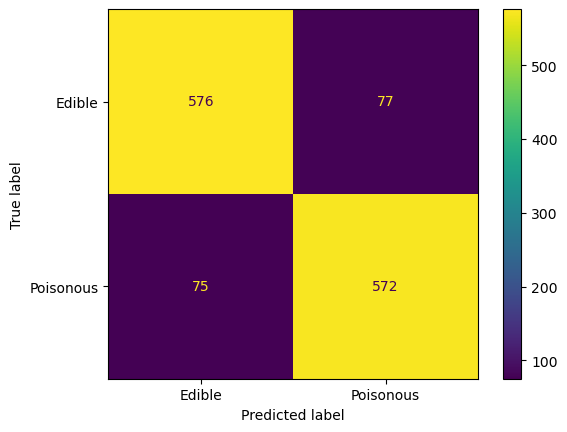

---RidgeClassifier FN: 66


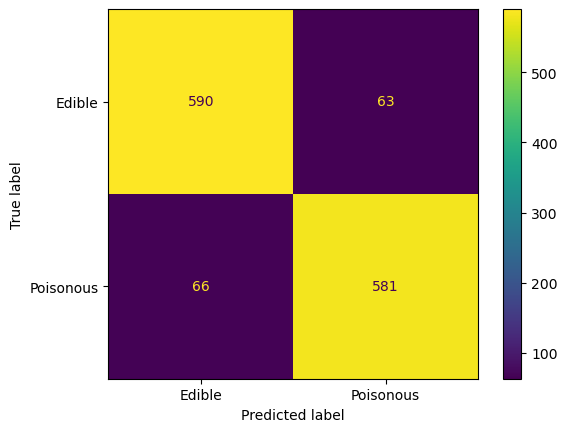

---LinearSVC FN: 75


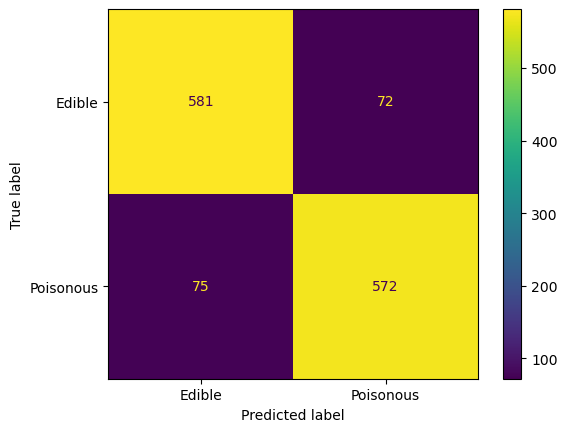

---SVC FN: 16


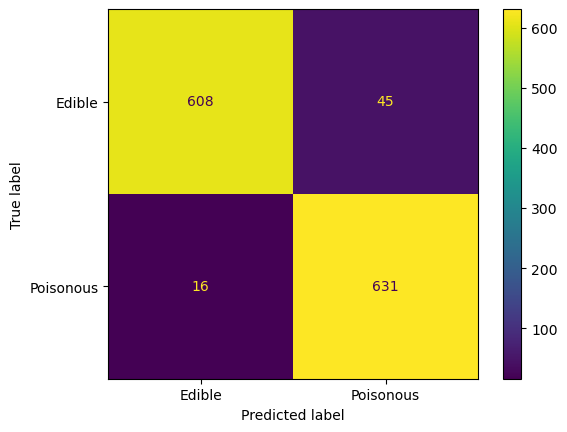

---SVC FN: 67


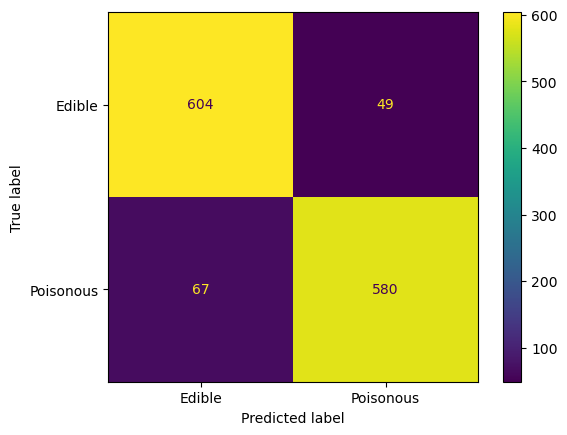

---SVC FN: 19


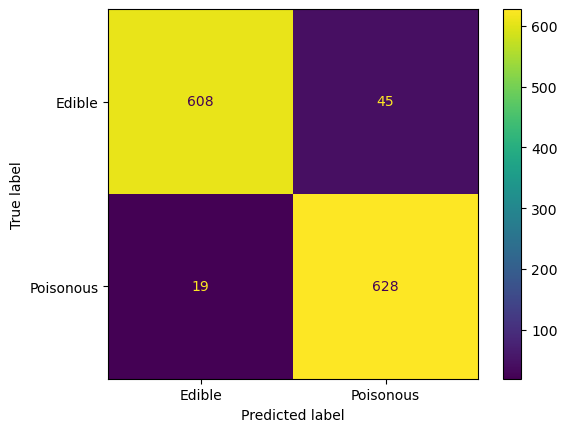

---DecisionTreeClassifier FN: 21


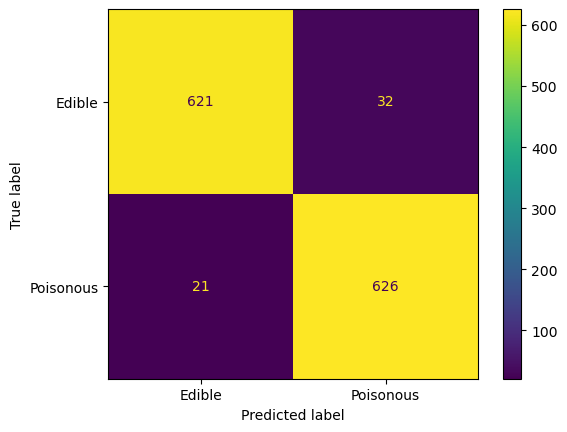

---RandomForestClassifier FN: 21


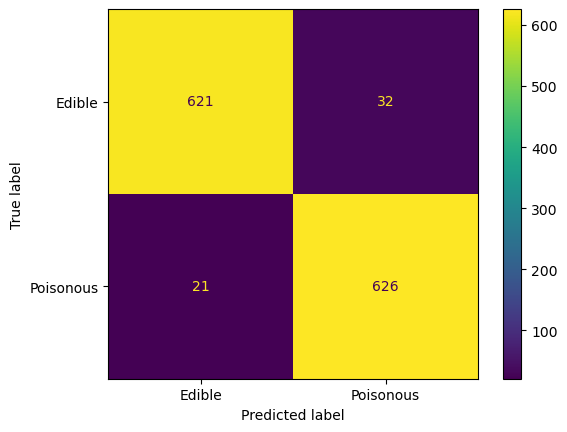

---GradientBoostingClassifier FN: 51


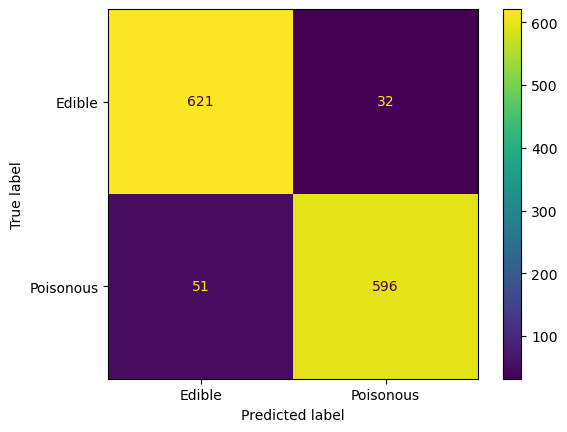

---ExtraTreesClassifier FN: 21


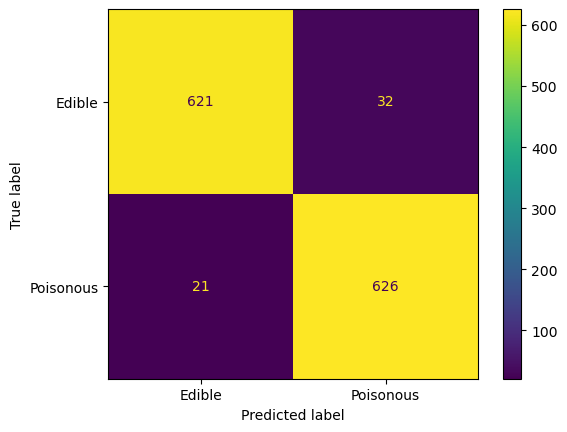

---MLPClassifier FN: 26


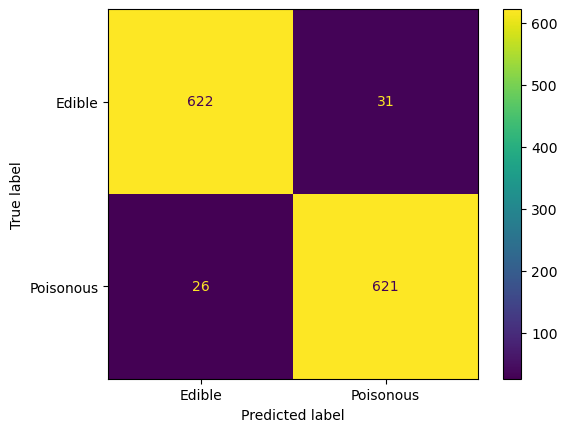

---GaussianNB FN: 3


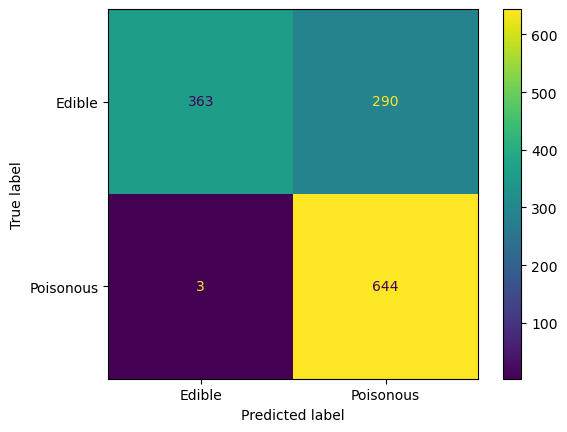

---KNeighborsClassifier FN: 32


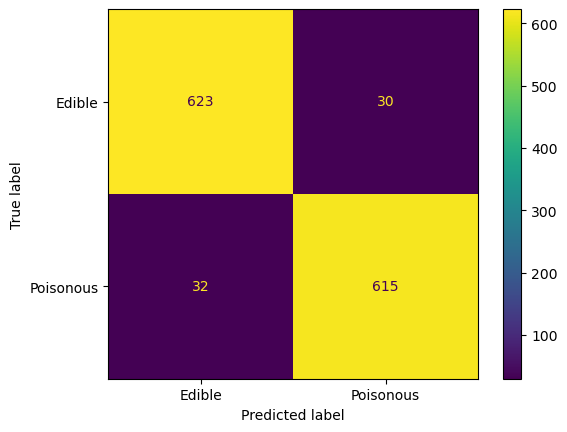

---QuadraticDiscriminantAnalysis FN: 11


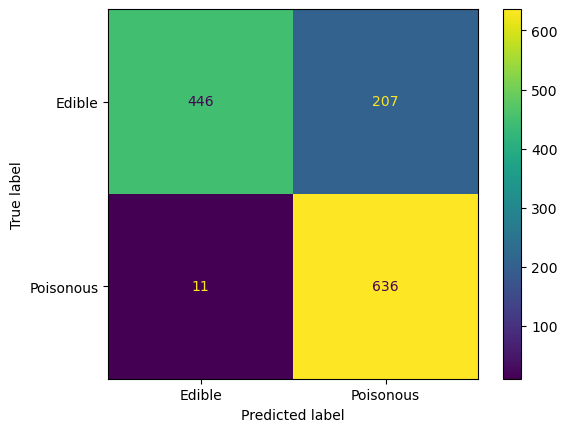

---VotingClassifier FN: 87


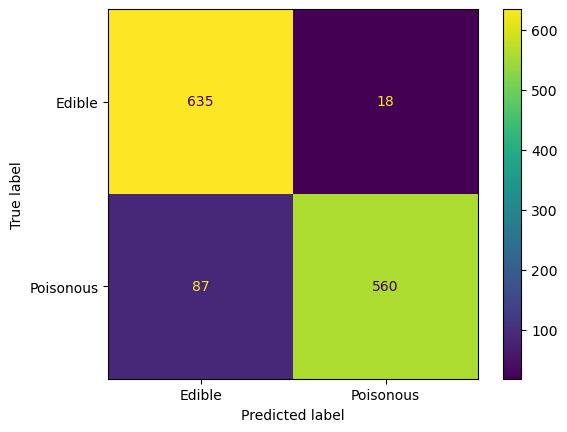

---XGBClassifier FN: 21


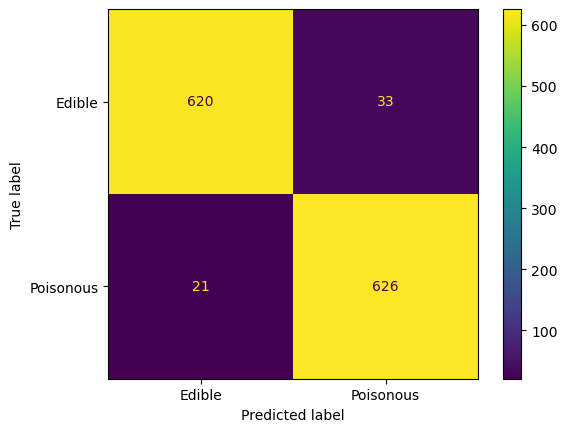

In [13]:
# Define a function to compute false negatives
def false_negatives(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn

# Train all models
for model in models:
    model.fit(X_train, y_train)

# Evaluate all models
for model in models:
    y_pred_model = model.predict(X_test)
    fn = false_negatives(y_test, y_pred_model)
    print(f"---{type(model).__name__} FN: {fn}")
    cm = confusion_matrix(y_test, y_pred_model)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=['Edible', 'Poisonous'])
    disp.plot()

    plt.show()


# Choosing one model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]  # Only used when kernel is 'poly'
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, scoring="recall")
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


# Optuna

In [17]:
import optuna
import xgboost as xgb
from sklearn.metrics import recall_score
import os

kf = KFold(n_splits=10)
n_jobs = max(1, os.cpu_count() - 1)

def objective(trial):
    # Define search space for hyperparameters
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.6, 1.0, 0.1),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'lambda': trial.suggest_loguniform('lambda', 0.001, 10),
        'alpha': trial.suggest_loguniform('alpha', 0.001, 10),
    }
    
    model = xgb.XGBClassifier(**param, random_state=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return 1 - recall_score(y_test, predictions)  # Optuna aims to minimize the objective

# Create a study object and specify the direction is "minimize".
study = optuna.create_study(direction="minimize")

# Optimize the study, the objective function is passed in as the first argument.
study.optimize(objective, n_trials=100, n_jobs=n_jobs)

# Results
print(f"The best parameters are {study.best_params} with a score of {1 - study.best_value}")


[I 2023-10-09 12:08:26,839] A new study created in memory with name: no-name-30cfa434-b303-4f46-8c6b-489aa281a6c4
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_39148/4268783903.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_39148/4268783903.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.1),
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_39148/4268783903.py:16: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. T

The best parameters are {'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.00586512238477793, 'subsample': 0.6, 'colsample_bytree': 0.8, 'gamma': 0.012127282930160127, 'min_child_weight': 2, 'lambda': 0.03385846630045234, 'alpha': 4.028772749738494} with a score of 0.9799072642967542


## Final model with parameters

# Submit

In [ ]:
X_transformed = cat_pipe.transform(X)

In [ ]:
gaussian_nb.fit(X_transformed,y)

In [ ]:
columns_order = ['cap.shape', 'cap.color', 'bruises', 'stalk.color.above.ring', 'stalk.color.below.ring', 'population']
test0 = test0[columns_order]
test0

In [ ]:
test_transformed = cat_pipe.transform(test0)

In [ ]:
y_predict = gaussian_nb.predict(test_transformed)

In [ ]:
submission_file = pd.DataFrame({
    'Id':test_id,
    'poisonous': y_predict
})

In [ ]:
submission_file.head()

In [ ]:
submission_file.to_csv('/Users/merlesteffen/Documents/GitHub/MushroomClassification/Data/submissions/submission_merle_2.csv',index=False)